**Team 4 / Exploratory Data Analysis / D01**

Below there are the answers to the questions concerning various characteristics of the data.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import collections

In [ ]:
df = pd.read_csv("data/listings.csv")

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-05-25,2019-04-04,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,1,2015-11-25,2016-02-22,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,3,2015-10-18,2018-03-31,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-12-05,2016-08-06,00000957422,t,6,6,0,0,0.33
4,27262,https://www.airbnb.com/rooms/27262,20211025162728,2021-10-26,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-11-12,2017-05-15,00000957579,t,6,6,0,0,0.23


***1. How many samples and features does each file have?***

In [ ]:
print(f"The dataset has {df.shape[0]} samples and {df.shape[1]} features.")

The dataset has 9582 samples and 67 features.


***2. What are the types of your features?***

In [ ]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 67, dtype: object

***3. Are there any missing values? If yes, how many and how many rows are affected?***

In [ ]:
print(f"The dataset has {df.isna().sum().sum()} missing values. \nThere are {sum([True for idx,row in df.iterrows() if any(row.isna())])} rows affected.")

The dataset has 56123 missing values. 
There are 9582 rows affected.


In [ ]:
print(f"There are {len(df.columns[df.isnull().any()].tolist())} columns affected.")

There are 29 columns affected.


***4. How many listings per neighborhood are there?***

In [ ]:
df.groupby(["neighbourhood_cleansed"])["id"].agg(["count"])

,count
neighbourhood_cleansed,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,33
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,21
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,599
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,70
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,61
ΑΚΡΟΠΟΛΗ,319
ΑΜΠΕΛΟΚΗΠΟΙ,329
ΑΝΩ ΚΥΨΕΛΗ,71
ΑΝΩ ΠΑΤΗΣΙΑ,58


***5.  How many listings per room type are there?***

In [ ]:
df.groupby(["room_type"])["id"].agg(["count"])

,count
room_type,
Entire home/apt,8463
Hotel room,138
Private room,891
Shared room,90


***6. How many listings per room number are there?***

In [ ]:
# values - nan - replace with 0 

df['bathrooms_text'] = df['bathrooms_text'].str.replace('Shared half-bath', '0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Half-bath', '0.5')

df['_bathrooms'] = (df['bathrooms_text'].str.split(' ').str[0]).astype(float)

df['rooms'] = df['_bathrooms'] + df['bedrooms']

df.groupby(['rooms'])["id"].agg(["count"])


,count
rooms,
1.0,6
1.5,6
2.0,4866
2.5,440
3.0,1799
3.5,425
4.0,557
4.5,147
5.0,216


***7.  What is the distribution of listings per host? What are the most listings that a single host has?***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


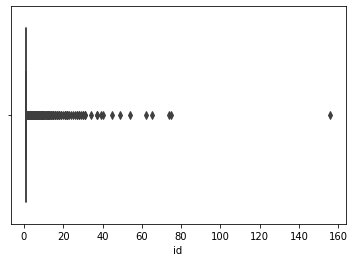

In [ ]:
sns.boxplot(df.groupby(["host_id"])["id"].count())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


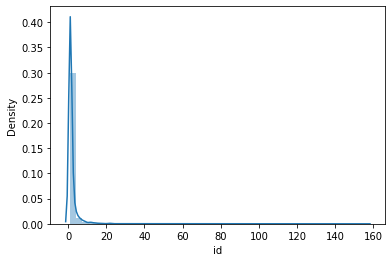

In [ ]:
sns.distplot(df.groupby(["host_id"])["id"].count())

***8.  When was the first host registered?***

In [ ]:
df['dates'] = pd.to_datetime(df['host_since'],  format='%Y-%m-%d')

print(f"The first host was registered at {df['dates'].min().date()}.")

The first host was registered at 2009-09-08.


***9.  What year had the most hosts registered?***

In [ ]:
year = df.groupby(["host_since"])["host_id"].count().idxmax()
count = df.groupby(["host_since"])["host_id"].count().max()

print(f"In {year} the most hosts were registered. Number of hosts: {count}.")

In 2015-03-24 the most hosts were registered. Number of hosts: 162.


***10. How many identified hosts are there? What is their percentage over all hosts?***


In [ ]:
count_verified = np.sum(df["host_identity_verified"] == 't')

count_hosts = len(df["host_id"].unique())

percentage = count_verified / count_hosts * 100

print(f'There are {count_verified} identified hosts. \nTheir percentage over all hosts is {percentage}.')

There are 6928 identified hosts. 
Their percentage over all hosts is 144.33333333333334.


***11. What are the top-20 most common amenities provided by the hosts?***

In [ ]:
df["amenities"] = df["amenities"].str.replace('\"', "")
df["amenities"] = df["amenities"].str.replace('[', ",", regex=True)
df["amenities"] = df["amenities"].str.replace(']', "", regex=True)

top_20 = Counter("".join(df["amenities"]).split(",")).most_common(20)

print("The top-20 most common amenities provided by the hosts are:", end ="")

for i in top_20:
    print(i[0], end =", ")


The top-20 most common amenities provided by the hosts are: Essentials,  Wifi,  Air conditioning,  Long term stays allowed,  Hangers,  Hair dryer,  Iron,  Shampoo, Kitchen,  Heating,  Hot water,  TV,  Dishes and silverware,  Cooking basics,  Refrigerator,  Coffee maker,  Dedicated workspace,  Bed linens,  Washer,  Elevator, 

***12.  What is the distribution of price for each room type?***

In [ ]:
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


*Entire home/apt*

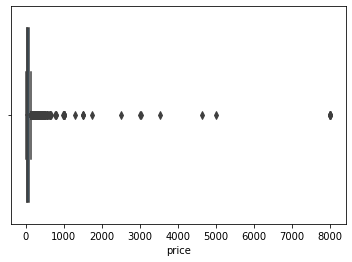

In [ ]:
sns.boxplot(x = df[df.room_type == 'Entire home/apt']['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


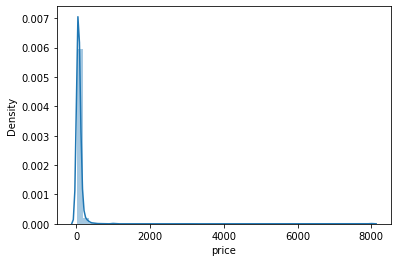

In [ ]:
sns.distplot(df[df.room_type == 'Entire home/apt']['price'])

*Hotel room*

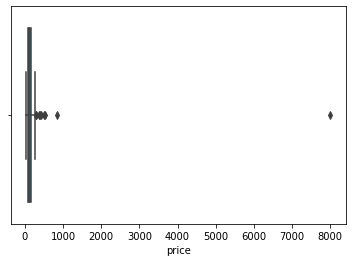

In [ ]:
sns.boxplot(x = df[df.room_type == 'Hotel room']['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


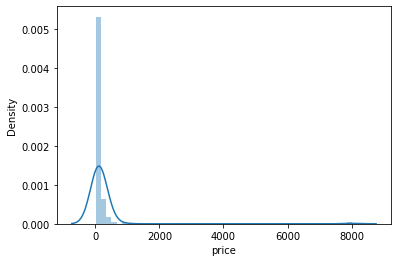

In [ ]:
sns.distplot(df[df.room_type == 'Hotel room']['price'])

*Private Room*

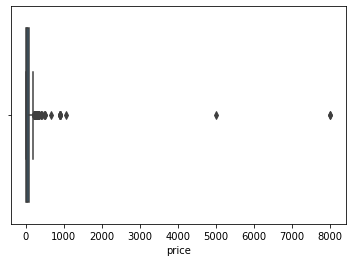

In [ ]:
sns.boxplot(x = df[df.room_type == 'Private room']['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


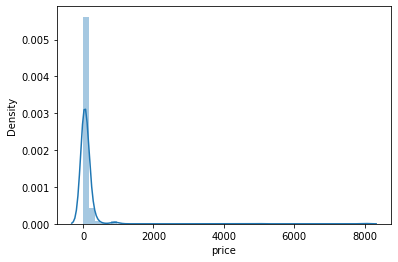

In [ ]:
sns.distplot(df[df.room_type == 'Private room']['price'])

*Shared Room*

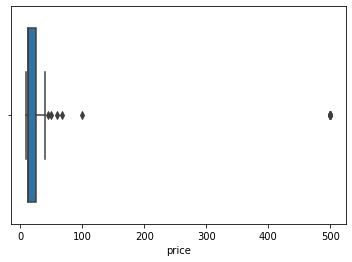

In [ ]:
sns.boxplot(x = df[df.room_type == 'Shared room']['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


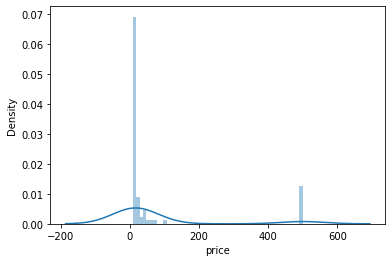

In [ ]:
sns.distplot(df[df.room_type == 'Shared room']['price'])

***13. How many ratings do I have?***

In [ ]:
df["number_of_reviews"].sum()

print(f'There are {df["number_of_reviews"].sum()} ratings in total.')

There are 406607 ratings in total.


***14. Do all listings have ratings?***

In [ ]:
if (df["number_of_reviews"].isna().sum() == 0):
    print("Yes, all listings have ratings.")
else:
    print("No, not all listings have ratings.")

Yes, all listings have ratings.


***15. Describe data.***

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,_bathrooms,rooms
count,9.582000e+03,9.582000e+03,9.582000e+03,9579.000000,9579.000000,0.0,9582.000000,9582.000000,9582.000000,0.0,...,9582.000000,9582.000000,9582.00000,9582.000000,9582.000000,9582.000000,9582.000000,7874.000000,9572.000000,8759.000000
mean,3.189967e+07,2.021103e+13,1.437052e+08,17.809375,17.809375,NaN,37.979937,23.731852,3.829159,NaN,...,42.434460,8.671885,1.14068,11.083072,9.933312,0.920685,0.097683,1.860970,1.206018,2.717548
std,1.331709e+07,0.000000e+00,1.153289e+08,60.121461,60.121461,NaN,0.013226,0.012372,1.959972,NaN,...,69.982756,14.536008,1.92865,23.451291,23.081999,4.082871,1.015924,2.049245,0.514672,1.192684
min,1.059500e+04,2.021103e+13,3.717700e+04,0.000000,0.000000,NaN,37.950550,23.697700,1.000000,NaN,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000
25%,2.251695e+07,2.021103e+13,3.849921e+07,1.000000,1.000000,NaN,37.969223,23.724032,2.000000,NaN,...,2.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.430000,1.000000,2.000000
50%,3.278173e+07,2.021103e+13,1.288502e+08,3.000000,3.000000,NaN,37.978386,23.729830,4.000000,NaN,...,12.000000,2.000000,0.00000,3.000000,2.000000,0.000000,0.000000,1.200000,1.000000,2.000000
75%,4.264848e+07,2.021103e+13,2.244519e+08,11.000000,11.000000,NaN,37.987960,23.737930,4.000000,NaN,...,52.000000,12.000000,2.00000,9.000000,8.000000,0.000000,0.000000,2.640000,1.000000,3.000000
max,5.296030e+07,2.021103e+13,4.281993e+08,2095.000000,2095.000000,NaN,38.032430,23.780220,16.000000,NaN,...,745.000000,346.000000,20.00000,156.000000,156.000000,43.000000,14.000000,28.000000,12.000000,21.000000


***16. Useful plots.***

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

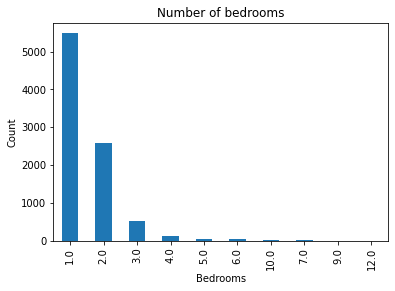

In [ ]:
df["bedrooms"].value_counts().plot(kind="bar")
plt.title("Number of bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

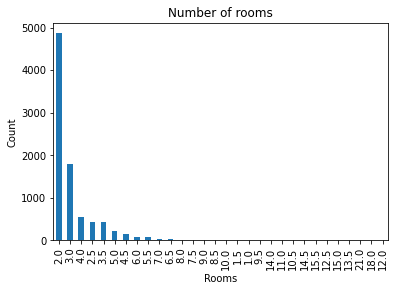

In [ ]:
df["rooms"].value_counts().plot(kind="bar")
plt.title("Number of rooms")
plt.xlabel("Rooms")
plt.ylabel("Count")
sns.despine

***17. Identify how the variables correlate with one another.***

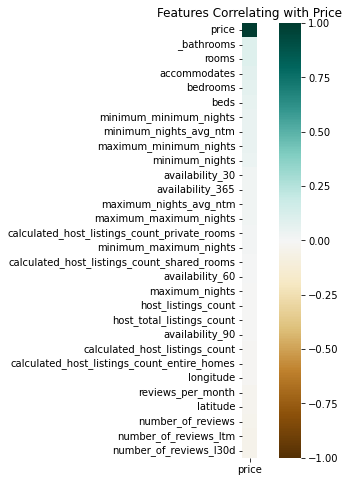

In [ ]:
cor_df = df.drop(["id", "listing_url", "scrape_id", "last_scraped", "name", "description", "neighborhood_overview", "picture_url", "host_id", "host_url", "neighbourhood_group_cleansed", "bathrooms", "calendar_updated"], axis=1)
cor = cor_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor_df.corr()[['price']].sort_values(by='price', ascending=False), annot=False, square=True, cmap="BrBG", vmin=-1, vmax=1).set_title('Features Correlating with Price')
plt.show()

***18. Room type pie chart.***

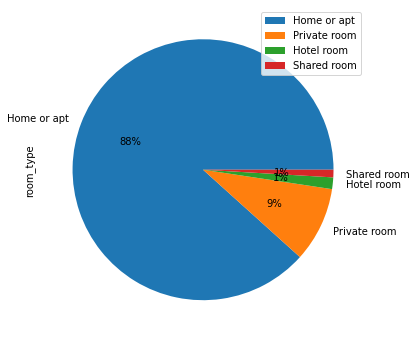

In [ ]:
df.room_type.replace({'Entire home/apt': 'Home or apt', 'Private room': 'Private room', 'Hotel room': 'Hotel room', 'Shared room': 'Shared room'}, inplace=True)
room_type = (df.room_type.value_counts()).to_frame()
plot = room_type.plot.pie(subplots=True, figsize=(11, 6), autopct='%.0f%%')

***19. Bar plot for TOP-10 neighbourhoods.***

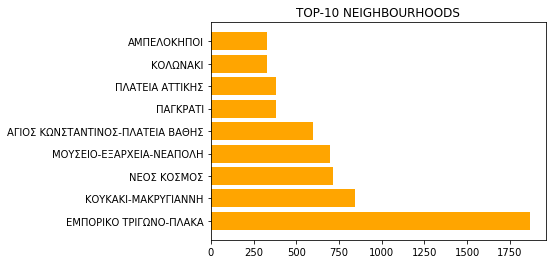

In [ ]:
neighbourhoods = df.neighbourhood_cleansed.value_counts()
neighbourhoods = neighbourhoods.to_frame()
neighbourhoods.reset_index(inplace=True)
neighbourhoods.rename(columns = {'index':'neighbourhood', 'neighbourhood_cleansed':'total_count'}, inplace = True)
neighbourhoods.sort_values(by=['total_count'], ascending=True)
neighbourhoods = neighbourhoods.iloc[0:9,]
plt.barh(neighbourhoods.neighbourhood,neighbourhoods.total_count,color='orange')
plt.title("TOP-10 NEIGHBOURHOODS")
plt.show()

***20. Bar plot for bedrooms.***

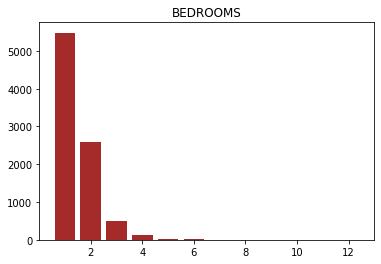

In [ ]:
bedrooms = df.bedrooms.value_counts()
bedrooms = bedrooms.to_frame()
bedrooms.reset_index(inplace=True)
bedrooms.rename(columns = {'index':'Number of bedrooms', 'bedrooms':'Total count'}, inplace = True)
plt.bar(bedrooms['Number of bedrooms'],bedrooms['Total count'],color='brown')
plt.title("BEDROOMS")
plt.show()

***21. Total count of TOP-20 amenities.***

In [ ]:
df["amenities"] = df["amenities"].str.replace('\"', "")
df["amenities"] = df["amenities"].str.replace('[', ",", regex=True)
df["amenities"] = df["amenities"].str.replace(']', "", regex=True)

top_20 = collections.Counter("".join(df["amenities"]).split(",")).most_common(20)

for x in top_20:
    df.loc[df['amenities'].str.contains(x[0]), x[0]] = int(1)

    df[x[0]] = df[x[0]].fillna(0)

df.drop('amenities', axis=1, inplace=True)

df.columns

# Sum of TOP-20 amenities in every row.
df['amenities']=df[' Essentials']+df[' Wifi']+df[' Air conditioning']+df[' Long term stays allowed']+df[' Hangers']+df[' Hair dryer']+df[' Iron']+df[' Shampoo']+df['Kitchen']+df[' Heating']+df[' Hot water']+df[' Dishes and silverware']+df[' TV']+df[' Cooking basics']+df[' Refrigerator']+df[' Coffee maker']+df[' Dedicated workspace']+df[' Bed linens']+df[' Washer']+df[' Elevator']

df = df.drop([' Essentials', ' Wifi', ' Air conditioning', ' Long term stays allowed',
       ' Hangers', ' Hair dryer', ' Iron', ' Shampoo', 'Kitchen', ' Heating',
       ' Hot water', ' Dishes and silverware', ' TV', ' Cooking basics',
       ' Refrigerator', ' Coffee maker', ' Dedicated workspace', ' Bed linens',
       ' Washer', ' Elevator'], axis=1)

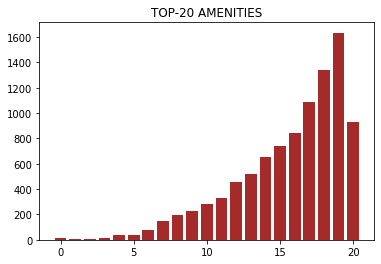

In [ ]:
amenities = df.amenities.value_counts()
amenities = amenities.to_frame()
amenities.reset_index(inplace=True)
amenities
amenities.rename(columns = {'index':'Number of amenities', 'amenities':'Total count'}, inplace = True)
plt.bar(amenities['Number of amenities'], amenities['Total count'], color='brown')
plt.title("TOP-20 AMENITIES")
plt.show()

In [ ]:
amenities

,Number of amenities,Total count
0,19.0,1634
1,18.0,1339
2,17.0,1085
3,20.0,929
4,16.0,845
5,15.0,743
6,14.0,651
7,13.0,522
8,12.0,459
9,11.0,329


***22. Total count for bathrooms.***

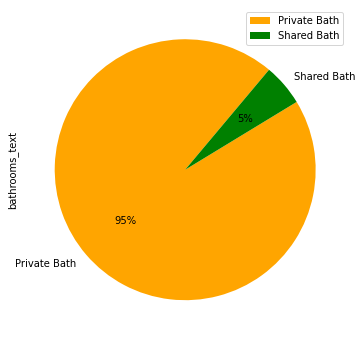

In [ ]:
dfBathrooms = pd.read_csv("listings.csv")
dfBathrooms.bathrooms_text.replace({
    '1 bath':'Private Bath',
    '1.5 baths':'Private Bath',
    '2 baths':'Private Bath',
    '1 private bath':'Private Bath',
    '1 shared bath':'Shared Bath',
    '2.5 baths':'Private Bath',
    '3 baths':'Private Bath',
    '1.5 shared baths':'Shared Bath',
    '2 shared baths':'Shared Bath',
    '3.5 baths':'Private Bath',
    '3 shared baths':'Shared Bath',
    '4 baths':'Private Bath',
    '4.5 baths':'Private Bath',
    '5 baths':'Private Bath',
    'Half-bath':'Private Bath',
    '0 baths':'Private Bath',
    '5 shared baths':'Shared Bath',
    '3.5 shared baths':'Shared Bath',
    '0 shared baths':'Shared Bath',
    '7 baths':'Private Bath',
    '2.5 shared baths':'Shared Bath',
    '4 shared baths':'Shared Bath',
    '5.5 baths':'Private Bath',
    '6 baths':'Private Bath',
    '6.5 baths':'Private Bath',
    '9.5 baths':'Private Bath',
    'Shared half-bath':'Shared Bath',
    '12 baths':'Private Bath'
    }, inplace=True)

bathrooms_text = (dfBathrooms.bathrooms_text.value_counts()).to_frame()
plot = bathrooms_text.plot.pie(subplots=True, figsize=(11, 6), autopct='%.0f%%', startangle = 50, colors = ['orange', 'green'])

***23. Mean price per neighbourhood (TOP-10).***

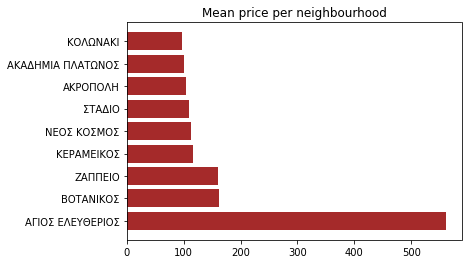

In [ ]:
avg_price = df.groupby('neighbourhood_cleansed')['price'].agg(np.mean)
avg_price = avg_price.to_frame()
avg_price.reset_index(inplace=True)
avg_price.rename(columns = {'neighbourhood_cleansed':'Neighbourhood', 'price':'Mean Price'}, inplace = True)
avg_price = avg_price.sort_values(by=['Mean Price'], ascending=False)
avg_price.reset_index(inplace=True)
avg_price = avg_price.iloc[0:9,]
plt.barh(avg_price['Neighbourhood'], avg_price['Mean Price'], color='brown')
plt.title("Mean price per neighbourhood")
plt.show()

***24. Line chart of mean price per number of rooms.***

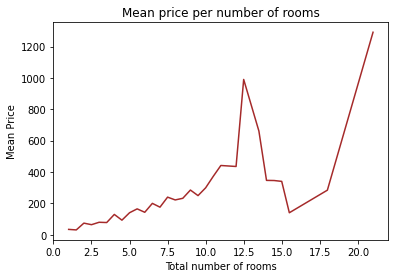

In [ ]:
rooms = df.groupby('rooms')['price'].agg(np.mean)
rooms = rooms.to_frame()
rooms.reset_index(inplace=True)
axisX = rooms['rooms']
axisY = rooms['price']
plt.plot(axisX, axisY, color='brown')
plt.title('Mean price per number of rooms')
plt.xlabel('Total number of rooms')
plt.ylabel('Mean Price')
plt.show()